In [12]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [34]:
def load_data(file_path):
    return pd.read_csv(file_path)

# Recommend movies for a particular user
def recommend_movies(user_id, data,user_idx,cluster_labels):
    # user_ratings = data.iloc[user_idx[user_id], 1:]  # Assuming first column is user IDs
    # print('user_ratings')
    # print(user_ratings)
    # print("cluster_labels")
    # print(cluster_labels)
    # print('user_idx')
    # print(user_idx)
    # print("user_id")
    # print(user_id)
    user_cluster = cluster_labels[user_idx[user_id]]
    l = []
    for i,j in cluster_labels.items():
        if j == user_cluster and i!=user_idx[user_id]:
            l.append(data[i]) 
    rating_movie = []
    for i in l:
        
    print("use")
    # cluster_indices = np.where(cluster_labels == user_cluster)[0]
    # recommended_movies = []
    # print(cluster_indices)
    # for idx in cluster_indices:
    #     movie_ratings = data.iloc[idx, 1:]  # Assuming first column is movie IDs
    #     similarity = np.dot(user_ratings, movie_ratings) / (np.linalg.norm(user_ratings) * np.linalg.norm(movie_ratings))
    #     recommended_movies.append((idx, similarity))
    # recommended_movies.sort(key=lambda x: x[1], reverse=True)
    
    return recommended_movies

In [14]:
file_path = "./EncodedCombined.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Movie_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data.iloc[:501, 1:]  # Exclude first column (user IDs)
data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


C:\Users\Srinivasan M\AppData\Local\Temp\ipykernel_8172\1039058901.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


     UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0         1     1193       5       0          0          0           0   
1         1      661       3       0          0          1           1   
2         1      914       3       0          0          0           0   
3         1     3408       4       0          0          0           0   
4         1     2355       5       0          0          1           1   
..      ...      ...     ...     ...        ...        ...         ...   
496      17     3510       4       0          0          0           0   
497      17      300       5       0          0          0           0   
498      17     1343       4       0          0          0           0   
499      17      529       4       0          0          0           0   
500      17     1356       4       1          1          0           0   

     Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi  \
0         0      0            0  ...

In [29]:
user_ids = set(data_matrix['UserID'])
user_ids

{1, 2, 12, 15, 17}

In [15]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [16]:
avgdict = avg_rating.set_index('MovieID')['AvgRating'].to_dict()
A = data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# print(A)

A_mat = pd.DataFrame(A)
# Iterate over rows
for index, row in A_mat.iterrows():
    for col in A_mat.columns:  # Exclude userID column
        if pd.isnull(A_mat.loc[index, col]):
            avg_rating=avgdict[str(col)]
            A_mat.loc[index, col]=float(avg_rating)

print(A)

MovieID      1         6         21        24        32        34       47    \
UserID                                                                         
1        5.000000  3.878723  3.623894  3.179487  3.945731  3.891491  4.10642   
2        4.146846  3.878723  1.000000  3.179487  3.945731  3.891491  4.10642   
12       4.146846  3.878723  3.623894  3.179487  3.945731  3.891491  4.10642   
15       4.146846  4.000000  3.623894  3.179487  3.000000  3.891491  4.00000   
17       4.146846  3.878723  3.623894  3.000000  5.000000  5.000000  4.10642   

MovieID     48        50        70    ...      3753      3755      3773  \
UserID                                ...                                 
1        5.00000  4.517106  3.156455  ...  3.745161  3.351431  2.818713   
2        2.97644  4.517106  3.156455  ...  3.745161  3.351431  2.818713   
12       2.97644  4.517106  3.156455  ...  3.745161  3.351431  2.818713   
15       2.97644  4.000000  2.000000  ...  5.000000  3.000000  2

In [17]:
A_mat

MovieID,1,6,21,24,32,34,47,48,50,70,...,3753,3755,3773,3785,3793,3798,3809,3893,3897,3948
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.878723,3.623894,3.179487,3.945731,3.891491,4.10642,5.00000,4.517106,3.156455,...,3.745161,3.351431,2.818713,3.011419,3.820649,3.334773,3.397797,3.502683,4.226358,3.635731
2,4.146846,3.878723,1.000000,3.179487,3.945731,3.891491,4.10642,2.97644,4.517106,3.156455,...,3.745161,3.351431,2.818713,3.011419,3.820649,3.334773,3.000000,1.000000,4.226358,3.635731
12,4.146846,3.878723,3.623894,3.179487,3.945731,3.891491,4.10642,2.97644,4.517106,3.156455,...,3.745161,3.351431,2.818713,3.000000,3.820649,3.334773,3.397797,3.502683,4.000000,3.635731
15,4.146846,4.000000,3.623894,3.179487,3.000000,3.891491,4.00000,2.97644,4.000000,2.000000,...,5.000000,3.000000,2.000000,3.011419,3.820649,4.000000,3.397797,3.502683,4.226358,3.000000
17,4.146846,3.878723,3.623894,3.000000,5.000000,5.000000,4.10642,2.97644,5.000000,3.156455,...,3.745161,3.351431,2.818713,3.011419,4.000000,3.334773,3.397797,3.502683,4.226358,3.635731


In [18]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
U_red,Sigma_red,V_red = A.reduced_svd(int(non_zero_diag[0]))  # Number of components for SVD 


Outputs

[[ 0.45135964  0.10549832 -0.29009132  0.70323913  0.45436366]
 [ 0.44619998  0.48825675  0.74372841 -0.08398982  0.04821503]
 [ 0.44577518  0.09501674 -0.26005168  0.13535801 -0.84042111]
 [ 0.43370987 -0.85069829  0.28987092 -0.05408691  0.03546317]
 [ 0.45865051  0.13326552 -0.459416   -0.69076281  0.28924678]]
[[159.73217014   0.           0.         ...   0.           0.
    0.        ]
 [  0.          10.81259647   0.         ...   0.           0.
    0.        ]
 [  0.           0.           9.1911663  ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
[[-0.06045222  0.00266784  0.01608076 ... -0.03377751 -0.02755111
  -0.01487773]
 [-0.05461794  0.01982297 -0.01396997 ... -0.05132433  0.00961913
   0.03308605]
 [-0.04339226  0.12809117  0.20284094 ... -0.03834354 -0.03094922
   0.09314621]
 ...
 [-0.04203433  0.12229646  0.1

In [19]:
def elbow_method(data, max_clusters=4):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())
    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Assuming your data is in V_red_T
# Perform Elbow Method
new_mat = (U_red.dot(Sigma)).dot(V_red)
new_mat

array([[-4.61647710e+00, -2.45778228e-01,  6.82649372e-01,
        -7.23571515e+00, -5.17262629e+00,  3.35876295e+00,
         6.45641720e+00,  3.77126674e+00,  3.13504127e-01,
        -2.96841927e+00,  4.28216565e-01,  6.32383274e+00,
         2.17000609e+00, -5.05130376e+00, -9.40158611e-01,
        -8.32550100e+00, -2.40379329e-01,  4.64306709e-01,
        -1.11972504e+01,  3.23382814e+00, -1.05687332e+00,
         9.16656365e+00, -7.51458088e-01, -1.04318411e+01,
        -1.52710644e+01,  5.95468676e+00, -4.53079421e+00,
        -5.46737913e-01, -2.14335149e+00,  3.55899786e+00,
         6.56506579e+00,  7.32330528e+00, -7.29710407e-01,
         4.08588827e+00,  4.82213058e+00, -2.85223295e+00,
        -3.87350363e+00, -5.83278620e+00,  5.33390226e+00,
         6.29956509e+00,  4.02010042e-01, -1.11044177e-01,
         1.25537777e+00,  3.68438841e+00, -7.37279236e+00,
        -7.79627519e+00, -5.54908405e+00,  7.91511989e+00,
         3.11950792e+00, -2.95443825e+00,  5.36187709e+0

sample_points_ids
[1]
the tuples
(-4.8833706043810245, 1.1472871766437642, 2.4844123789110193, -7.639891003839348, -4.731852480282626, 3.544387612918366, 6.842699358967449, 3.7341118647643, -0.5922747600837414, -2.8725923373020548, 0.23415199482466936, 6.9600750605656545, 2.6214343145174848, -5.0256135857558455, -0.7885136891216586, -8.408254284489827, 0.11239504698753078, 1.0677936025188255, -11.249236850026817, 3.312856141005953, -1.4075389620919856, 8.99821713041313, -0.5551133538955665, -10.643437325893991, -15.21485371411552, 5.34065555609656, -4.23422870919693, -0.7714219010220974, -2.535213374526677, 3.759381552488585, 5.887193201713704, 6.592284494890271, -1.5849254826006327, 3.23928081779238, 5.257654193140375, -2.943654259280069, -4.258371152281609, -5.675710809336311, 4.637303005106667, 5.94757943681465, 0.03268643063815293, -0.3620007269921125, 1.287033688910729, 3.0368663615720926, -7.6374187736530565, -7.622182780531976, -5.274136450690135, 6.707255814078292, 3.4658769459

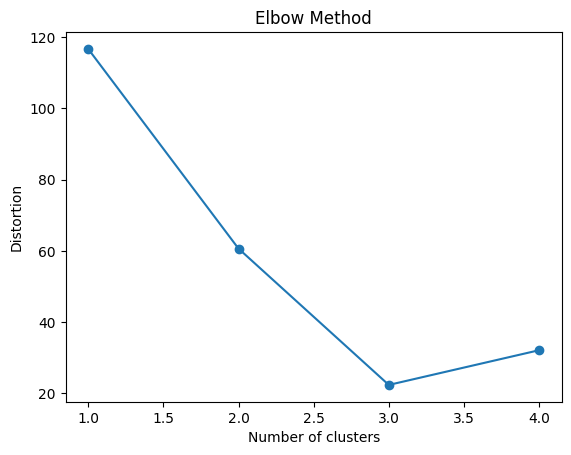

In [20]:
elbow_method(new_mat)

In [21]:
km = KMeans(4)
km.fit(new_mat)

sample_points_ids
[2, 4, 1, 3]
the tuples
(-4.072126856751332, 0.21932814613518975, 0.3439715271446318, -7.69835752447579, -4.8861041872066595, 2.9615948401584666, 5.698627041558602, 3.3676424915959693, 0.5443671201769393, -2.66484413601038, 0.23744130244399136, 6.583522824856171, 2.754559458363984, -4.4417158975576925, -0.9198879688588065, -7.906278069636869, 0.45844812474114327, 0.8733844772633721, -11.184520952501378, 2.9832751283650887, -1.693619452746861, 8.445700940427258, -0.866155041925748, -10.298251133469392, -14.731012417056736, 5.6337901856482615, -4.625464005402051, 0.6072446520111799, -2.175769714188539, 3.294531221510881, 6.05882857695554, 6.736558742055567, -0.7049675039149125, 3.8221977818726884, 4.8764881565787, -2.7377505840153966, -3.7793842358377483, -5.66467365210464, 4.942577145988168, 6.164385019159797, 0.2823008367468775, -0.14033680201452042, 0.6617208861390848, 3.2550499144845646, -6.840044366924605, -7.649722167382558, -5.112353782229479, 7.987210388133658, 

In [35]:


cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

# User ID for which we want to recommend movies
user_id = 1  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, A_mat,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie_id, similarity in recommended_movies[:10]:  # Display top 10 recommended movies
    movie_title = data.iloc[movie_id, 0]  # Assuming the first column is movie titles
    print(movie_title, "Similarity:", similarity)

user_ratings
UserID                                        1
MovieID                                     661
Rating                                        3
Title          James and the Giant Peach (1996)
Action                                        0
Adventure                                     0
Animation                                     1
Children's                                    1
Comedy                                        0
Crime                                         0
Documentary                                   0
Drama                                         0
Fantasy                                       0
Film-Noir                                     0
Horror                                        0
Musical                                       1
Mystery                                       0
Romance                                       0
Sci-Fi                                        0
Thriller                                      0
War                        

C:\Users\Srinivasan M\AppData\Local\Temp\ipykernel_8172\226989651.py:16: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  cluster_indices = np.where(cluster_labels == user_cluster)[0]
